In [5]:
# coding=utf-8
import cv2
import numpy as np
import time
import shutil
import os
import matplotlib.pylab as plt
from scipy.misc import imresize
from skimage import transform,data
# 导入Python的数据处理库pandas，相当于python里的excel
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
import json
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

ImportError: cannot import name 'imresize' from 'scipy.misc' (c:\users\jam_0\appdata\local\programs\python\python38\lib\site-packages\scipy\misc\__init__.py)

In [45]:
df = '../Datasets/Datasets2/BreCaHAD/groundTruth/Case_1-04.json'
df1 = df
with open(df) as f:
    TumorArea_list = json.load(f)
    TumorArea_list

In [46]:
X = []
Y = []
for i in range(len(TumorArea_list['tumor'])):
    X.append(TumorArea_list['tumor'][i]['x'])
    Y.append(TumorArea_list['tumor'][i]['y'])


In [47]:
if __name__ == "__main__":
    Img1 = cv2.imread('../Datasets/Datasets2/BreCaHAD/images/Case_1-04.tif')
    Img = cv2.imread('../Datasets/Datasets2/BreCaHAD/images/Case_1-04.tif')
    # Img = cv2.resize(im1, (256,256), interpolation=cv2.INTER_CUBIC)
    kernel_2 = np.ones((2, 2), np.uint8)  # 2x2的卷积核
    kernel_3 = np.ones((3, 3), np.uint8)  # 3x3的卷积核
    kernel_4 = np.ones((4, 4), np.uint8)  # 4x4的卷积核
    if Img is not None:  # 判断图片是否读入
        HSV = cv2.cvtColor(Img, cv2.COLOR_BGR2HSV)  # 把RGB图像转换为HSV格式

There are 479 potential tumor areas
96


(-0.5, 1359.5, 1023.5, -0.5)

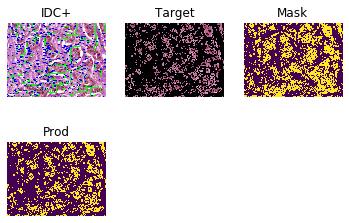

In [50]:
        '''
       HSV模型中颜色的参数分别是：色调（H），饱和度（S），明度（V）
      下面两个值是要识别的颜色范围2
        '''
        Lower = np.array([130, 25, 56])  # 要识别颜色的下限
        Upper = np.array([142, 255, 225])  # 要识别的颜色的上限
        # mask是把HSV图片中在颜色范围内的区域变成白色，其他区域变成黑色
        mask = cv2.inRange(HSV, Lower, Upper)
        # 下面四行是用卷积进行滤波
        erosion = cv2.erode(mask, kernel_4, iterations=1)
        erosion = cv2.erode(erosion, kernel_4, iterations=1)
        dilation = cv2.dilate(erosion, kernel_4, iterations=1)
        dilation = cv2.dilate(dilation, kernel_4, iterations=1)
        # target是把原图中的非目标颜色区域去掉剩下的图像
        target = cv2.bitwise_and(Img1, Img1, mask=dilation)
        # 将滤波后的图像变成二值图像放在binary中
        ret, binary = cv2.threshold(dilation, 127, 255, cv2.THRESH_BINARY)
        # 在binary中发现轮廓，轮廓按照面积从小到大排列
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        p = 0
        loc = [[0]*4 for i in range(len(contours))]
        for i in range(len(contours)):  # 遍历所有的轮廓
            x, y, w, h = cv2.boundingRect(contours[i])  # 将轮廓分解为识别对象的左上角坐标和宽、高
            
            loc[i] = [x,y,w,h]
            
            # 在图像上画上矩形（图片、左上角坐标、右下角坐标、颜色、线条宽度）
            cv2.rectangle(Img, (x, y), (x + w, y + h), (0, 255,), 2)
            # 给识别对象写上标号
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(Img, str(p), (x - 10, y + 10), font, 0.5, (0, 0, 255), 3)  # 加减10是调整字符位置
            p += 1
            
        print('There are', p, 'potential tumor areas')  # 终端输出目标数量
        
        ans = 0
        
        for i in range(len(TumorArea_list['tumor'])):
            for j in range(len(loc)):
                if TumorArea_list['tumor'][i]['x']<=loc[j][0]/1360+loc[j][2]/1360 and TumorArea_list['tumor'][i]['x']>=loc[j][0]/1360 and TumorArea_list['tumor'][i]['y']<=loc[j][1]/1024+loc[j][3]/1024 and TumorArea_list['tumor'][i]['y']>=loc[j][1]/1024:
                    ans += 1
                    break
        print(ans)
        #print('Accuracy: ', ans/len(TumorArea_list['tumor']))   

plt.subplot(2, 3, 1)
plt.imshow(Img)
plt.title('IDC+')
plt.axis('off') 

plt.subplot(2, 3, 2)
plt.imshow(target)
plt.title('Target')
plt.axis('off') 

plt.subplot(2, 3, 3)
plt.imshow(mask)
plt.title('Mask')
plt.axis('off') 

plt.subplot(2, 3, 4)
plt.imshow(dilation)
plt.title('Prod')
plt.axis('off') 

        # cv2.imshow('target', target)
        # cv2.imshow('Mask', mask)
        # cv2.imshow("prod", dilation)
        # cv2.imshow('Img', Img)
        # cv2.imwrite('Img.png', Img)  # 将画上矩形的图形保存到当前目录

In [49]:
    # while True:
        # Key = chr(cv2.waitKey(15) & 255)
        # if Key == 'q':
            # cv2.destroyAllWindows()
            # break

In [41]:
#########################################################################################################################################

In [8]:
import numpy as np
import collections
 
#定义字典存放颜色分量上下限
#例如：{颜色: [min分量, max分量]}
#{'red': [array([160,  43,  46]), array([179, 255, 255])]}
 
def getColorList():
    dict = collections.defaultdict(list)
 
"""
    # 黑色
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 46])
    color_list = []
    color_list.append(lower_black)
    color_list.append(upper_black)
    dict['black'] = color_list
"""

    # #灰色
    # lower_gray = np.array([0, 0, 46])
    # upper_gray = np.array([180, 43, 220])
    # color_list = []
    # color_list.append(lower_gray)
    # color_list.append(upper_gray)
    # dict['gray']=color_list
 
    # 白色
    lower_white = np.array([0, 0, 221])
    upper_white = np.array([180, 30, 255])
    color_list = []
    color_list.append(lower_white)
    color_list.append(upper_white)
    dict['white'] = color_list
 

"""
    #红色
    lower_red = np.array([156, 43, 46])
    upper_red = np.array([180, 255, 255])
    color_list = []
    color_list.append(lower_red)
    color_list.append(upper_red)
    dict['red']=color_list
 
    # 红色2
    lower_red = np.array([0, 43, 46])
    upper_red = np.array([10, 255, 255])
    color_list = []
    color_list.append(lower_red)
    color_list.append(upper_red)
    dict['red2'] = color_list
 
    #橙色
    lower_orange = np.array([11, 43, 46])
    upper_orange = np.array([25, 255, 255])
    color_list = []
    color_list.append(lower_orange)
    color_list.append(upper_orange)
    dict['orange'] = color_list
""" 

    #黄色
    lower_yellow = np.array([26, 43, 46])
    upper_yellow = np.array([34, 255, 255])
    color_list = []
    color_list.append(lower_yellow)
    color_list.append(upper_yellow)
    dict['yellow'] = color_list
 
    #绿色
    lower_green = np.array([35, 43, 46])
    upper_green = np.array([77, 255, 255])
    color_list = []
    color_list.append(lower_green)
    color_list.append(upper_green)
    dict['green'] = color_list
 
    #青色
    lower_cyan = np.array([78, 43, 46])
    upper_cyan = np.array([99, 255, 255])
    color_list = []
    color_list.append(lower_cyan)
    color_list.append(upper_cyan)
    dict['cyan'] = color_list
 
    #蓝色
    lower_blue = np.array([100, 43, 46])
    upper_blue = np.array([124, 255, 255])
    color_list = []
    color_list.append(lower_blue)
    color_list.append(upper_blue)
    dict['blue'] = color_list
 
    # 紫色
    lower_purple = np.array([125, 43, 46])
    upper_purple = np.array([155, 255, 255])
    color_list = []
    color_list.append(lower_purple)
    color_list.append(upper_purple)
    dict['purple'] = color_list
 
    return dict
 
 
if __name__ == '__main__':
    color_dict = getColorList()
    print(color_dict)
 
    num = len(color_dict)
    print('num=',num)
 
    for d in color_dict:
        print('key=',d)
        print('value=',color_dict[d][1])

IndentationError: unexpected indent (<ipython-input-8-5fc3e073fba1>, line 30)

In [ ]:
import  cv2
import numpy as np
import colorList
 
filename='example.png'
 
#处理图片
def get_color(frame):
    print('go in get_color')
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    maxsum = -100
    color = None
    color_dict = colorList.getColorList()
    for d in color_dict:
        mask = cv2.inRange(hsv,color_dict[d][0],color_dict[d][1])
        cv2.imwrite(d+'.jpg',mask)
        binary = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)[1]
        binary = cv2.dilate(binary,None,iterations=2)
        img, cnts, hiera = cv2.findContours(binary.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        sum = 0
        for c in cnts:
            sum+=cv2.contourArea(c)
        if sum > maxsum :
            maxsum = sum
            color = d
 
    return color
 
 
if __name__ == '__main__':
    frame = cv2.imread(filename)
    print(get_color(frame))

In [ ]:
#########################################################################################################################################